c:\python 3.6\lib\site-packages\dateutil\parser\_parser.py:1206: UnknownTimezoneWarning: tzname IST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


created_at    datetime64[ns]
field4               float64
dtype: object
                        field4
created_at                    
2020-03-07 09:37:18        NaN
2020-03-07 09:37:35        NaN
2020-03-07 09:37:51        NaN
2020-03-07 09:38:08        NaN
2020-03-07 09:38:24        NaN
2020-03-07 09:38:40        NaN
2020-03-07 09:38:56        NaN
2020-03-07 09:39:12        NaN
2020-03-07 09:39:29        NaN
2020-03-07 09:39:45        NaN
2020-03-07 09:40:01        NaN
2020-03-07 09:40:17   4.528097
2020-03-07 09:40:34   5.621134
2020-03-07 09:40:50   6.714884
2020-03-07 09:41:07   7.807922
2020-03-07 09:41:23   8.902147
2020-03-07 09:41:39   9.993761
2020-03-07 09:41:55  11.086799
2020-03-07 09:42:11  12.179125
2020-03-07 09:42:27  13.273113
2020-03-07 09:42:44  13.273587
2020-03-07 09:43:00  13.273587
2020-03-07 09:43:16  13.273824
2020-03-07 09:43:33  13.273824
2020-03-07 09:43:49  13.274537
2020-03-07 09:44:05  13.274062
2020-03-07 09:44:21  13.274537
2020-03-07 09:44:38  13.27406

c:\python 3.6\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


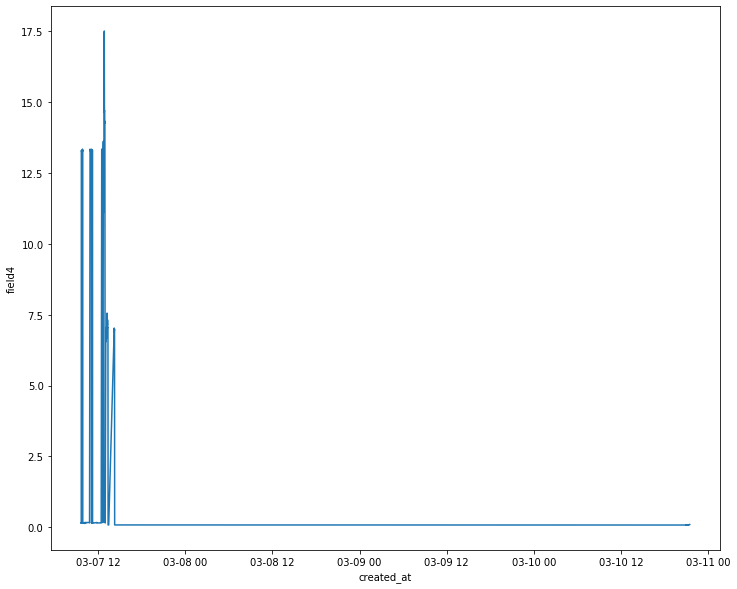

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=12,10
df=pd.read_csv('D:\\Data sets\\ph1.csv',error_bad_lines=False)
df['created_at']=pd.to_datetime(df['created_at'],infer_datetime_format=True)
dty=df.dtypes
print(dty)
indexdataset=df.set_index(['created_at'])
indexdataset.tail(5)
plt.xlabel("created_at")
plt.ylabel("field4")
plt.plot(indexdataset)
rolmean = indexdataset.rolling(window=12).mean()
rolstd = indexdataset.rolling(window=12).std()
print(rolmean,rolstd)


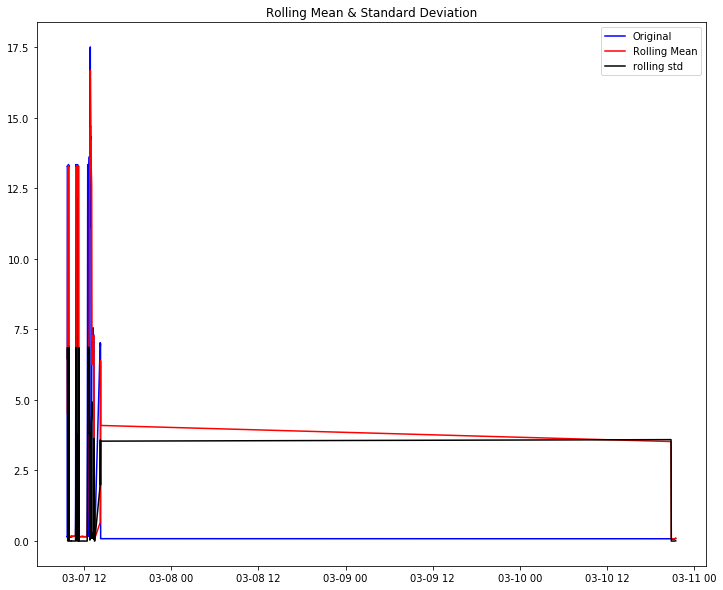

In [53]:
rcParams['figure.figsize']=12,10
orig=plt.plot(indexdataset,color='blue',label='Original')
mean=plt.plot(rolmean,color='red',label='Rolling Mean')
std=plt.plot(rolstd,color='black',label='rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [6]:

from statsmodels.tsa.stattools import adfuller
print('Result of Dickey-fuller Test')
dftest = adfuller(indexdataset['field4'],autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)


Result of Dickey-fuller Test
Test Statistic                  -2.835847
p-value                          0.053333
#Lags Used                       2.000000
number of Observations Used    553.000000
Critical Value (1%)             -3.442230
Critical Value (5%)             -2.866781
Critical Value (10%)            -2.569561
dtype: float64


Result of Dickey-fuller Test
Test Statistic                  -3.006907
p-value                          0.034254
#Lags Used                       1.000000
number of Observations Used    554.000000
Critical Value (1%)             -3.442209
Critical Value (5%)             -2.866771
Critical Value (10%)            -2.569556
dtype: float64


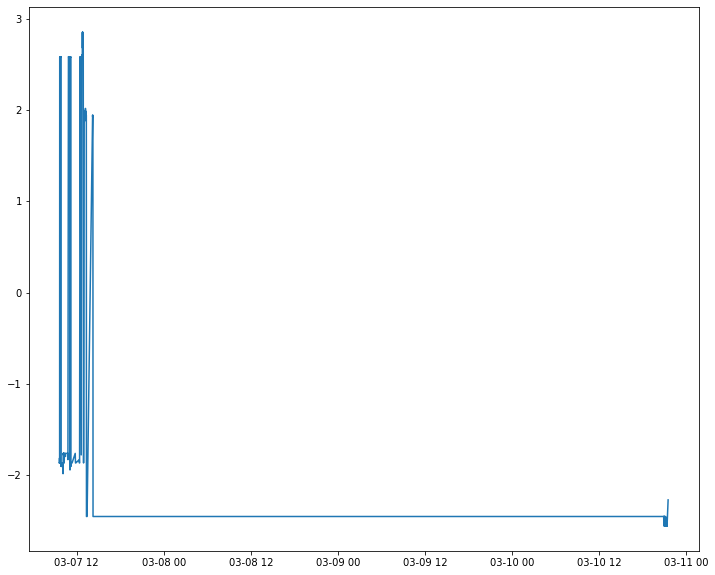

In [8]:
indexdataset_logscale=np.log(indexdataset)
plt.plot(indexdataset_logscale)

from statsmodels.tsa.stattools import adfuller
print('Result of Dickey-fuller Test')
dftest = adfuller(indexdataset_logscale['field4'],autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

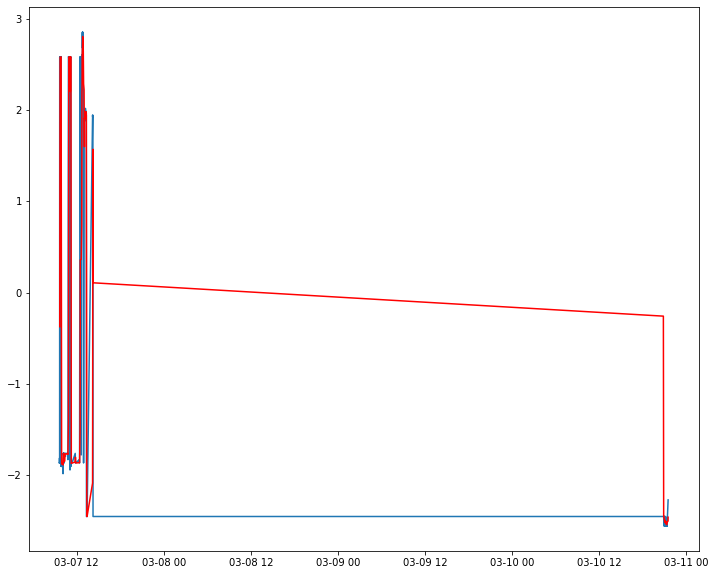

In [9]:
movingAverage=indexdataset_logscale.rolling(window=12).mean()
movingSTD = indexdataset_logscale.rolling(window=12).std()
plt.plot(indexdataset_logscale)
plt.plot(movingAverage,color='red')

In [10]:
datasetscaleminusmovingaverage=indexdataset - rolmean
datasetscaleminusmovingaverage.head(12)

datasetscaleminusmovingaverage.dropna(inplace=True)
datasetscaleminusmovingaverage

,field4
created_at,
2020-03-07 09:40:17,8.745013
2020-03-07 09:40:34,7.649126
2020-03-07 09:40:50,6.563926
2020-03-07 09:41:07,5.465188
2020-03-07 09:41:23,4.382363
2020-03-07 09:41:39,3.267959
2020-03-07 09:41:55,2.192011
2020-03-07 09:42:11,1.082595
2020-03-07 09:42:27,0.008547


In [11]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    movingAverage=timeseries.rolling(window=12).mean()
    movingSTD=timeseries.rolling(window=12).std()
    
    orig=plt.plot(indexdataset,color='blue',label='Original')
    mean=plt.plot(rolmean,color='red',label='Rolling Mean')
    std=plt.plot(rolstd,color='black',label='rolling std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Result of Dickey-fuller Test')
    dftest = adfuller(indexdataset['field4'],autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    


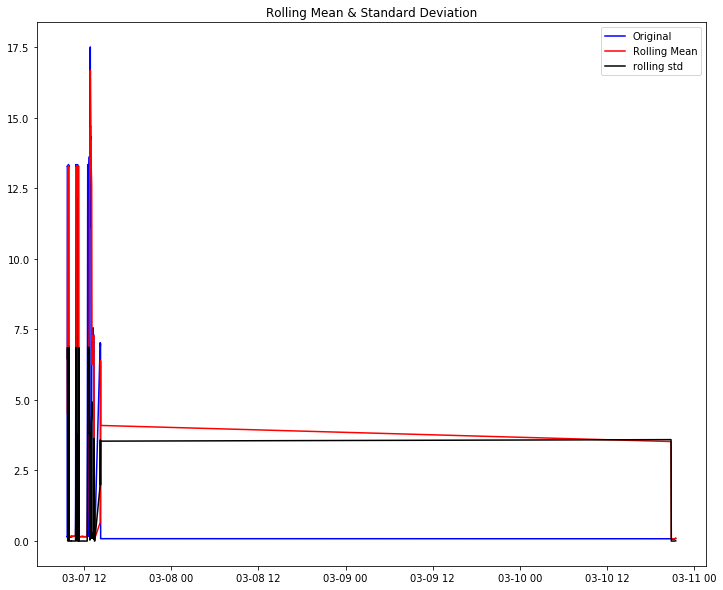

Result of Dickey-fuller Test
Test Statistic                  -2.835847
p-value                          0.053333
#Lags Used                       2.000000
number of Observations Used    553.000000
Critical Value (1%)             -3.442230
Critical Value (5%)             -2.866781
Critical Value (10%)            -2.569561
dtype: float64


In [12]:
test_stationarity(datasetscaleminusmovingaverage)

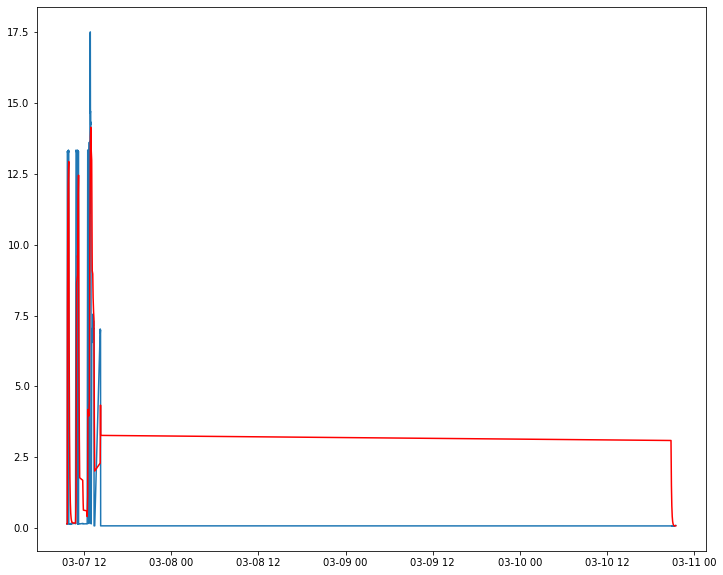

In [13]:
exponentialdecayweightAverage = indexdataset.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(indexdataset)
plt.plot(exponentialdecayweightAverage , color='red')


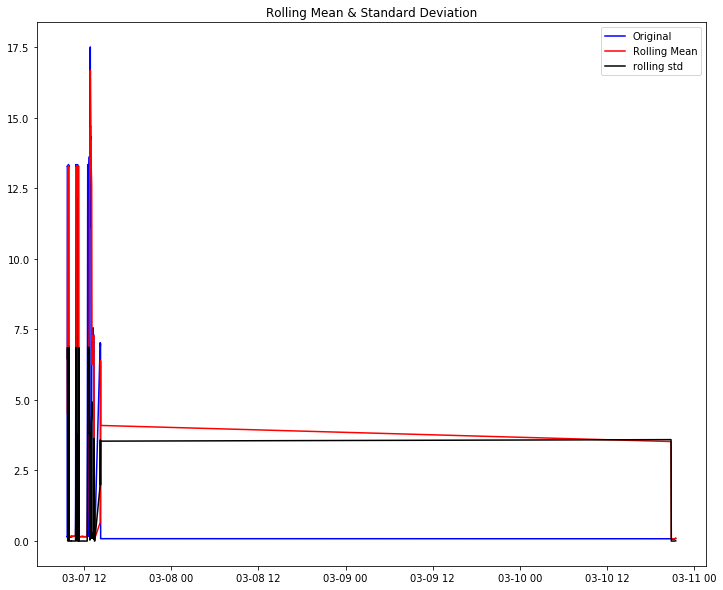

Result of Dickey-fuller Test
Test Statistic                  -2.835847
p-value                          0.053333
#Lags Used                       2.000000
number of Observations Used    553.000000
Critical Value (1%)             -3.442230
Critical Value (5%)             -2.866781
Critical Value (10%)            -2.569561
dtype: float64


In [14]:
datasetlogscaleminusmovinfgexponetialdecayaverage=indexdataset - exponentialdecayweightAverage
test_stationarity(datasetlogscaleminusmovinfgexponetialdecayaverage)

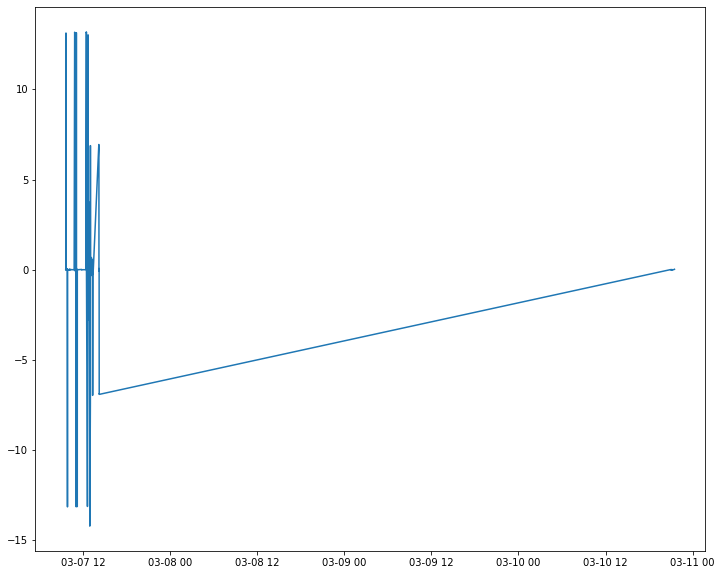

In [21]:
datasetlogdiffshifting=indexdataset-indexdataset.shift(5)
plt.plot(datasetlogdiffshifting)

In [16]:
#datasetlogdiffshifting.dropna(inplace=True)
#test_stationarity(datasetlogdiffshifting)

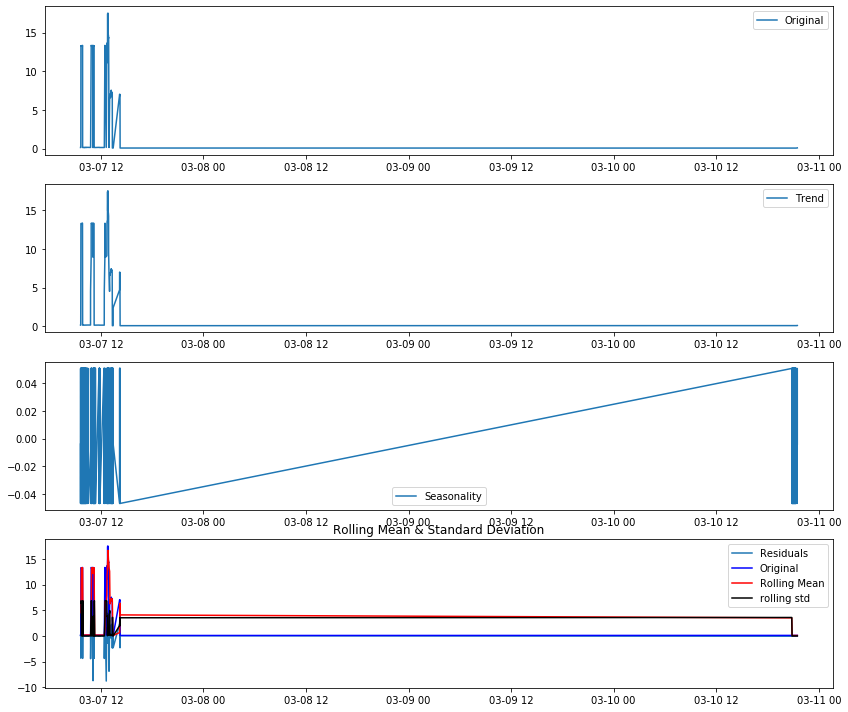

Result of Dickey-fuller Test
Test Statistic                  -2.835847
p-value                          0.053333
#Lags Used                       2.000000
number of Observations Used    553.000000
Critical Value (1%)             -3.442230
Critical Value (5%)             -2.866781
Critical Value (10%)            -2.569561
dtype: float64


In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexdataset,freq=3)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexdataset,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposeddata=residual
decomposeddata.dropna(inplace=True)
test_stationarity(decomposeddata)

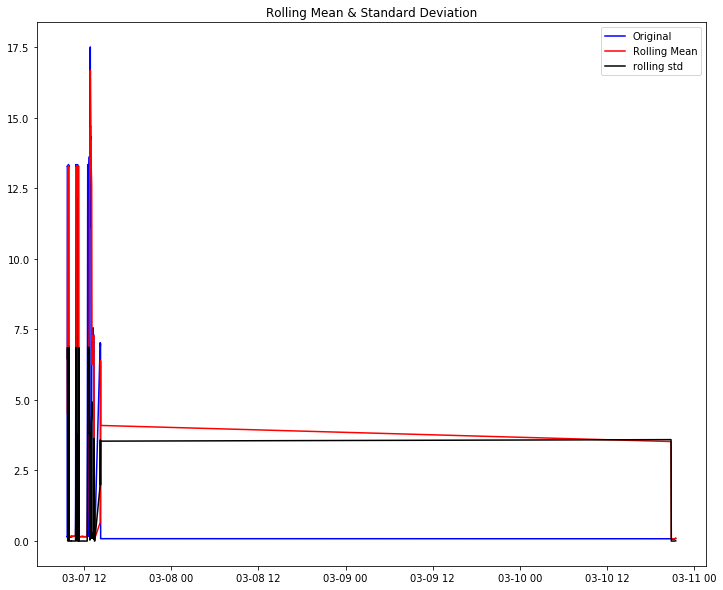

Result of Dickey-fuller Test
Test Statistic                  -2.835847
p-value                          0.053333
#Lags Used                       2.000000
number of Observations Used    553.000000
Critical Value (1%)             -3.442230
Critical Value (5%)             -2.866781
Critical Value (10%)            -2.569561
dtype: float64


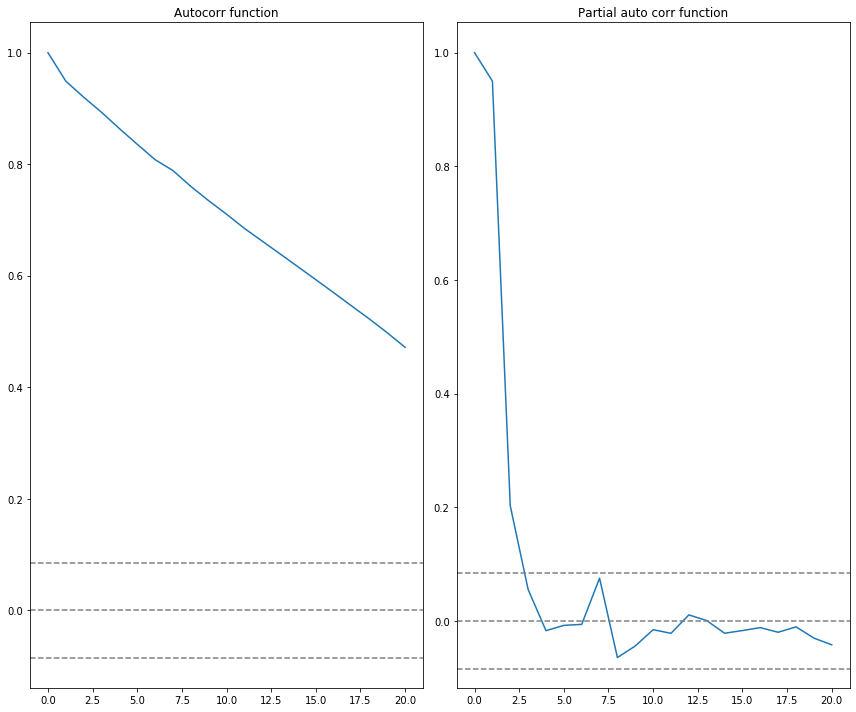

In [39]:
decomposelogdata= residual
decomposelogdata.dropna(inplace=True)
test_stationarity(decomposelogdata)





#ACF and #PACF graph
from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(indexdataset, nlags=20)
lag_pacf = pacf(indexdataset , nlags=20, method='ols')

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-2/np.sqrt(len(indexdataset)),linestyle='--',color='gray')
plt.axhline(y=2/np.sqrt(len(indexdataset)),linestyle='--',color='gray')
plt.title('Autocorr function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-2/np.sqrt(len(indexdataset)),linestyle='--',color='gray')
plt.axhline(y=2/np.sqrt(len(indexdataset)),linestyle='--',color='gray')
plt.title('Partial auto corr function')
plt.tight_layout()

c:\python 3.6\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\python 3.6\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting AR model


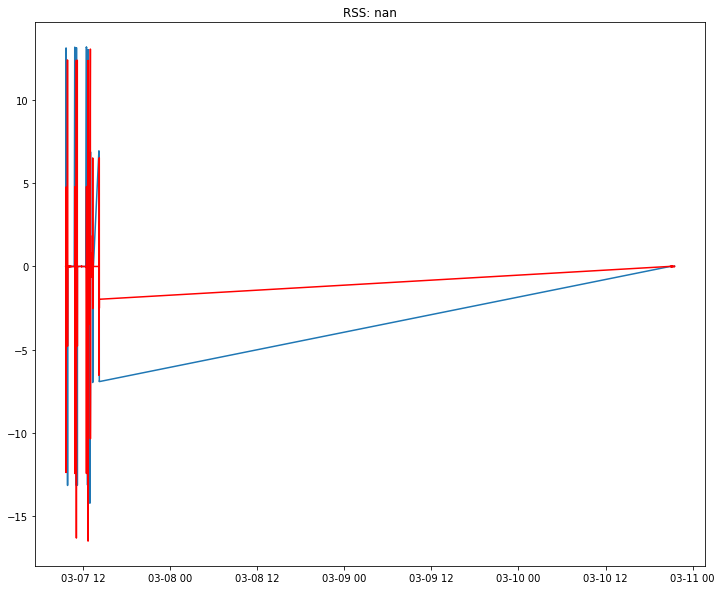

In [31]:
from statsmodels.tsa.arima_model import ARIMA

model= ARIMA(indexdataset , order=(3,2,0))
results_AR = model.fit(disp=1)
plt.plot(datasetlogdiffshifting)
plt.plot(results_AR.fittedvalues, color = 'red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues-datasetlogdiffshifting["field4"])**2))
print('Plotting AR model')

In [24]:
prediction_arima_diff= pd.Series(results_AR.fittedvalues,copy=True)
print(prediction_arima_diff)

created_at
2020-03-07 09:37:35   -0.000093
2020-03-07 09:37:51   -0.000113
2020-03-07 09:38:08   -0.000799
2020-03-07 09:38:24    0.000357
2020-03-07 09:38:40   -0.001944
2020-03-07 09:38:56   -0.000726
2020-03-07 09:39:12    0.001930
2020-03-07 09:39:29    0.000477
2020-03-07 09:39:45   -3.117304
2020-03-07 09:40:01   -0.918869
2020-03-07 09:40:17    0.030886
2020-03-07 09:40:34    0.000164
2020-03-07 09:40:50    0.000770
2020-03-07 09:41:07   -0.001961
2020-03-07 09:41:23    0.000628
2020-03-07 09:41:39   -0.002411
2020-03-07 09:41:55    0.004484
2020-03-07 09:42:11   -0.002560
2020-03-07 09:42:27    0.002688
2020-03-07 09:42:44   -0.003622
2020-03-07 09:43:00    0.000473
2020-03-07 09:43:16    0.001204
2020-03-07 09:43:33   -0.001975
2020-03-07 09:43:49    0.000628
2020-03-07 09:44:05   -0.001056
2020-03-07 09:44:21    0.000821
2020-03-07 09:44:38   -0.001063
2020-03-07 09:44:54   -0.000534
2020-03-07 09:45:10   -0.000107
2020-03-07 09:45:26   -0.000799
                         ... 

In [25]:
prediction_arima_diff_cumsum = prediction_arima_diff.cumsum()
print(prediction_arima_diff_cumsum)

created_at
2020-03-07 09:37:35   -0.000093
2020-03-07 09:37:51   -0.000206
2020-03-07 09:38:08   -0.001005
2020-03-07 09:38:24   -0.000649
2020-03-07 09:38:40   -0.002593
2020-03-07 09:38:56   -0.003319
2020-03-07 09:39:12   -0.001389
2020-03-07 09:39:29   -0.000912
2020-03-07 09:39:45   -3.118216
2020-03-07 09:40:01   -4.037085
2020-03-07 09:40:17   -4.006199
2020-03-07 09:40:34   -4.006035
2020-03-07 09:40:50   -4.005265
2020-03-07 09:41:07   -4.007226
2020-03-07 09:41:23   -4.006597
2020-03-07 09:41:39   -4.009008
2020-03-07 09:41:55   -4.004524
2020-03-07 09:42:11   -4.007084
2020-03-07 09:42:27   -4.004395
2020-03-07 09:42:44   -4.008017
2020-03-07 09:43:00   -4.007545
2020-03-07 09:43:16   -4.006340
2020-03-07 09:43:33   -4.008315
2020-03-07 09:43:49   -4.007687
2020-03-07 09:44:05   -4.008743
2020-03-07 09:44:21   -4.007922
2020-03-07 09:44:38   -4.008985
2020-03-07 09:44:54   -4.009519
2020-03-07 09:45:10   -4.009626
2020-03-07 09:45:26   -4.010425
                         ... 

In [26]:
prediction_arima_log=pd.Series(indexdataset['field4'].ix[0],index=indexdataset.index)
prediction_arima_log=prediction_arima_log.add(prediction_arima_diff_cumsum,fill_value=0)
prediction_arima_log.head(5)

c:\python 3.6\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


created_at
2020-03-07 09:37:18    0.153810
2020-03-07 09:37:35    0.153717
2020-03-07 09:37:51    0.153604
2020-03-07 09:38:08    0.152805
2020-03-07 09:38:24    0.153161
dtype: float64

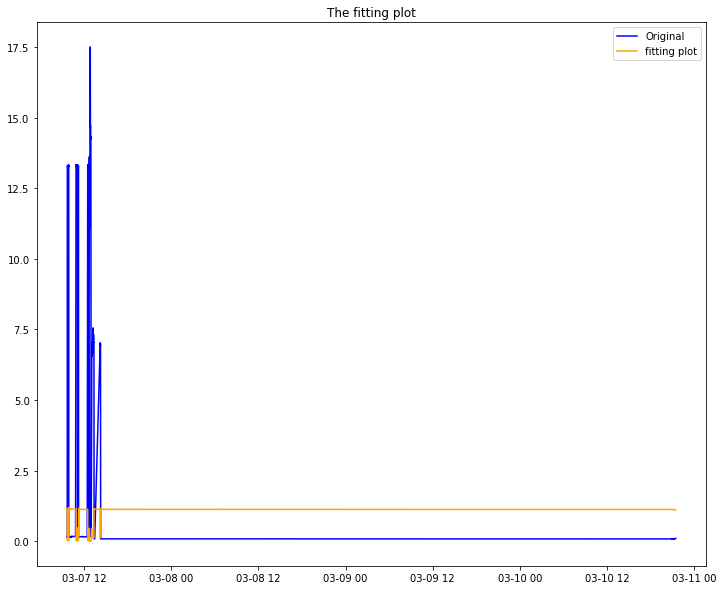

In [55]:
prediction_arima = np.exp(prediction_arima_log)
plt.plot(indexdataset,color='blue',label='Original')
plt.title('The fitting plot')
plt.plot(prediction_arima,color='orange',label='fitting plot')
plt.legend(loc='best')


c:\python 3.6\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\python 3.6\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\python 3.6\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Text(0.5, 1.0, 'RSS: nan')

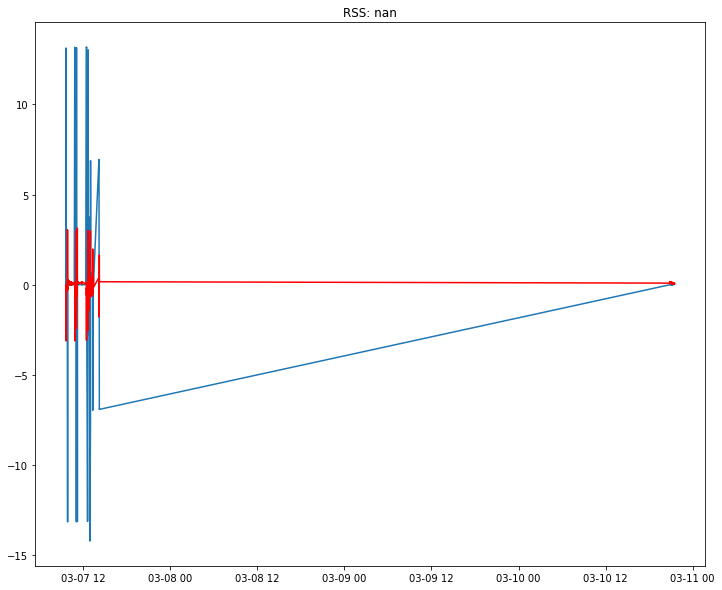

In [37]:
model= ARIMA(indexdataset , order=(3,1,3))
results_ARIMA = model.fit(disp=1)
plt.plot(datasetlogdiffshifting)
plt.plot(results_ARIMA.fittedvalues, color = 'red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues-datasetlogdiffshifting["field4"])**2))

c:\python 3.6\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
c:\python 3.6\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
c:\python 3.6\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


(array([0.20164993, 0.22222331, 0.30640843, 0.32613094, 0.40511442,
       0.42344777, 0.49756368, 0.51457848, 0.58410408, 0.59986975,
       0.66506635, 0.67964866, 0.74076268, 0.75422399, 0.81148782,
       0.82388722, 0.87752001, 0.8889135 , 0.93912192, 0.94956256,
       0.99654151, 1.00607958, 1.05001288, 1.05869603, 1.09975701,
       1.10763039, 1.14598252, 1.15308891, 1.18888635, 1.19526628,
       1.22865442, 1.2343463 , 1.26546224, 1.27050246, 1.2994755 ,
       1.30389853, 1.33085062, 1.33468913, 1.35973525, 1.36302019,
       1.3862688 , 1.38902948, 1.41058286, 1.41284706, 1.43280166,
       1.43459568, 1.45304247, 1.45439124, 1.471416  , 1.47234314,
       1.48802677, 1.48855464, 1.50297345, 1.50312324, 1.51634917,
       1.51614095, 1.52824187, 1.52769465, 1.53873455, 1.53786634,
       1.54790558, 1.54673343, 1.55582893, 1.554369  , 1.56257444,
       1.56084203, 1.56820803, 1.56621763, 1.57279194, 1.57055727,
       1.57638493, 1.57391899, 1.57904246, 1.57635756, 1.5808

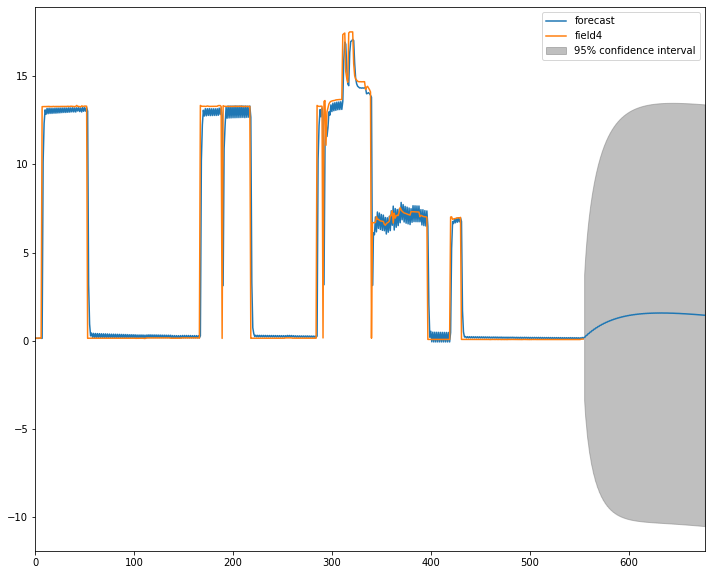

In [41]:
results_ARIMA.plot_predict(1,678)
x=results_ARIMA.forecast(steps=100)
print(x)

